In [1]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from functions.import_dataset import *
import process_data
from sklearn.metrics import confusion_matrix , accuracy_score ,classification_report
import numpy
#import warnings
#warnings.filterwarnings("ignore")




In [2]:
x_train, y_train, x_test, y_test = imp_dataset("dataset/voice.csv")


c:\Users\abhin\OneDrive - UT Arlington\Study stuff\Coading\ML\Gender_recognisition_voice\functions\import_dataset.py:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_voice["label"] = df_voice["label"].replace("female", 1)


In [3]:

lr = LogisticRegression(max_iter=3000)
lr.fit(x_train, y_train.ravel())

LogisticRegression(max_iter=3000)

In [4]:
lr_p_test = lr.predict(x_test)
lr_acc = accuracy_score(y_test, lr_p_test)
print("Accuracy of Logistic Regression: ", lr_acc)
print("Classification Report: \n", classification_report(y_test, lr_p_test))

Accuracy of Logistic Regression:  0.9731437598736177
Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.97      0.97       314
           1       0.97      0.97      0.97       319

    accuracy                           0.97       633
   macro avg       0.97      0.97      0.97       633
weighted avg       0.97      0.97      0.97       633



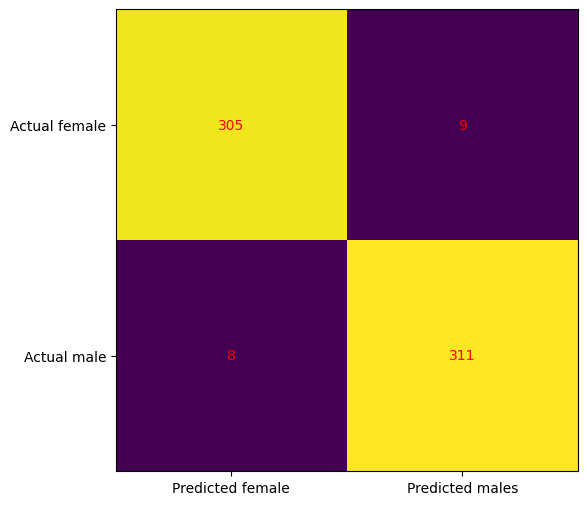

In [5]:
cm = confusion_matrix(y_test, lr.predict(x_test))

fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted female', 'Predicted males'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual female', 'Actual male'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

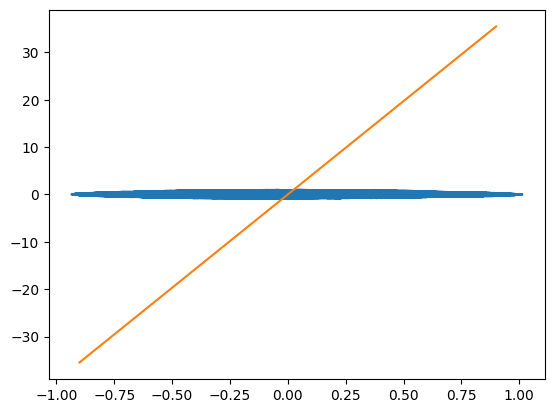

In [6]:
x_train, y_train, x_test, pca = process_data.process_data(x_train, y_train, x_test)
# print(x_train)
x_f = x_train[:, 0]
x_f = numpy.array(x_f)
# print(x_f)
# print(x_f.shape)
# print(x_train.shape)
y_f = x_train[:, 1]
y_f = numpy.array(y_f)
plt.figure()
plt.plot(x_f, y_f)
thetaN = lr.coef_
theta0 = lr.intercept_
theta1 = thetaN[0][0]
theta2 = thetaN[0][1]
x = numpy.array([-0.9, 0.9])
y = -((theta0+theta1)*x)/(theta2)
plt.plot(x, y)
plt.show()